## Model m4_1s

Setup environment

In [15]:
Pkg.update()

   Updating registry at `~/.julia/registries/General`
No Changes to `~/.julia/dev/StanModels/Project.toml`
No Changes to `~/.julia/dev/StanModels/Manifest.toml`


In [16]:
using DrWatson
@quickactivate "StanModels"

Load required packages

In [17]:
using StanModels, StanSample, MCMCChains, CSV, StatsPlots

In [18]:
pkg"status"

Project StanModels v2.0.4
Status `~/.julia/dev/StanModels/Project.toml`
  [336ed68f] CSV v0.6.2
  [a93c6f00] DataFrames v0.21.5
  [31c24e10] Distributions v0.23.6
  [c7f686f2] MCMCChains v4.0.2
  [c1514b29] StanSample v2.1.6 `~/.julia/dev/StanSample`
  [10745b16] Statistics
  [8dfed614] Test


In [19]:
DataDir = stanmodels_path("..", "data", "exp_pro")
df = DataFrame!(CSV.File(joinpath(DataDir, "Howell1.csv"), delim=';'))
df = filter(row -> row[:age] >= 18, df);
first(df,5)

,height,weight,age,male
,Float64,Float64,Float64,Int64
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


In [20]:
m4_1s = "
// Inferring a Rate
data {
  int N;
  real<lower=0> h[N];
}
parameters {
  real<lower=0> sigma;
  real<lower=0,upper=250> mu;
}
model {
  // Priors for mu and sigma
  mu ~ normal(178, 20);
  sigma ~ uniform( 0 , 50 );

  // Observed heights
  h ~ normal(mu, sigma);
}
";

In [21]:
m_4_1s = SampleModel("m4.1s", m4_1s);


/var/folders/l7/pr04h0650q5dvqttnvs8s2c00000gn/T/jl_o7hdJS/m4.1s.stan updated.


In [22]:
m4_1_data = Dict("N" => length(df[!, :height]), "h" => df[!, :height]);

In [23]:
rc = stan_sample(m_4_1s, data=m4_1_data);

In [24]:
if success(rc)
  chn = read_samples(m_4_1s; output_format=:mcmcchains)
  # Update parameter names
  chn = replacenames(chn, Dict("mu" => "μ", "sigma" => "σ"))
  chn |> display
end

Chains MCMC chain (1000×2×4 Array{Float64,3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = σ, μ
internals         = 

Summary Statistics
  parameters       mean       std   naive_se      mcse         ess      rhat  
      Symbol    Float64   Float64    Float64   Float64     Float64   Float64  
                                                                              
           σ     7.7712    0.2944     0.0047    0.0052   1526.1821    0.9994  
           μ   154.6042    0.4112     0.0065    0.0056   5872.6819    0.9996  

Quantiles
  parameters       2.5%      25.0%      50.0%      75.0%      97.5%  
      Symbol    Float64    Float64    Float64    Float64    Float64  
                                                                     
           σ     7.2162     7.5730     7.7629     7.9545     8.3902  
           μ   153.7980   154.3288   154.5950   154.8800   155.4221  


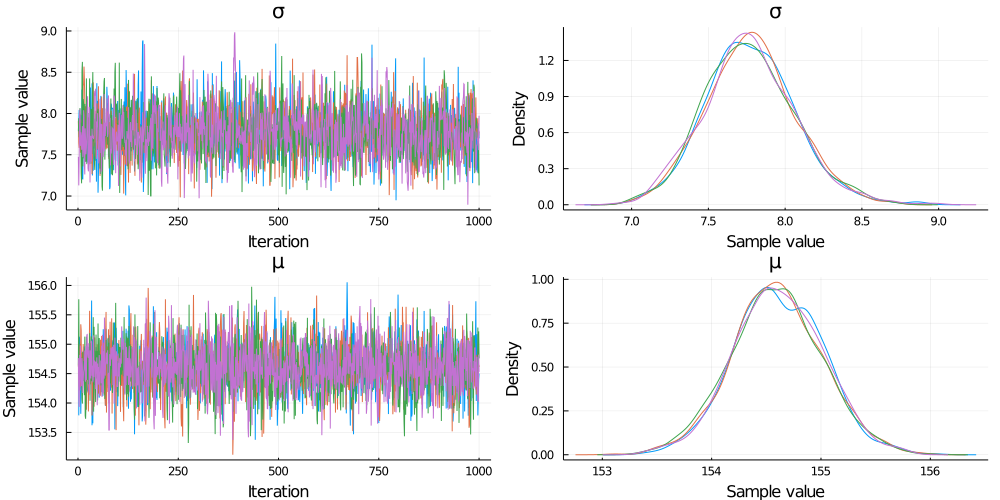

In [25]:
plot(chn)

In [26]:
stan_summary(m_4_1s, true)

Input files: /var/folders/l7/pr04h0650q5dvqttnvs8s2c00000gn/T/jl_o7hdJS/m4.1s_chain_1.csv, /var/folders/l7/pr04h0650q5dvqttnvs8s2c00000gn/T/jl_o7hdJS/m4.1s_chain_2.csv, /var/folders/l7/pr04h0650q5dvqttnvs8s2c00000gn/T/jl_o7hdJS/m4.1s_chain_3.csv, /var/folders/l7/pr04h0650q5dvqttnvs8s2c00000gn/T/jl_o7hdJS/m4.1s_chain_4.csv
Inference for Stan model: m4x461s_model
4 chains: each with iter=(1000,1000,1000,1000); warmup=(0,0,0,0); thin=(1,1,1,1); 4000 iterations saved.

Warmup took (0.017, 0.013, 0.014, 0.014) seconds, 0.058 seconds total
Sampling took (0.019, 0.018, 0.018, 0.020) seconds, 0.075 seconds total

                Mean     MCSE  StdDev    5%   50%   95%    N_Eff  N_Eff/s    R_hat

lp__            -891  2.4e-02     1.0  -894  -891  -891     1749    23315     1.00
accept_stat__   0.90  1.8e-03    0.12  0.65  0.95   1.0  4.6e+03  6.1e+04  1.0e+00
stepsize__      0.87  4.7e-02   0.067  0.77  0.92  0.94  2.0e+00  2.7e+01  2.1e+13
treedepth__      1.8  5.3e-02    0.50   1.0   2.0   3.

In [27]:
dfs = read_summary(m_4_1s);

In [28]:
read_summary(m_4_1s)[8:9,:mean]

2-element Vector{Float64}:
   7.77116
 154.604